In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Aim is to predict the marks of students of the test data

  internet sex  traveltime  studytime  freetime  absences  age   iq  marks
0       no   M           2          2         5         6   18  118  73.13
1      yes   M           2          2         2         7   19  107  67.78
2      yes   M           3          3         3         5   18  108  70.84
3       no   F           3          3         4         9   17  100  66.68
4      yes   M           1          4         3         4   19   96  71.88
(1000, 8) (1000, 1)
['no' 'M' 2 2 5 6 18 118] [73.13]


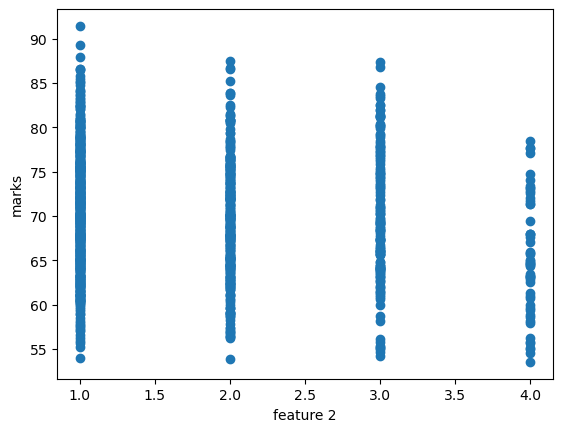

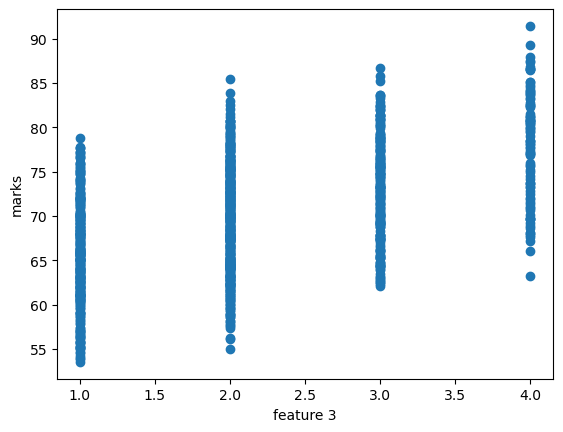

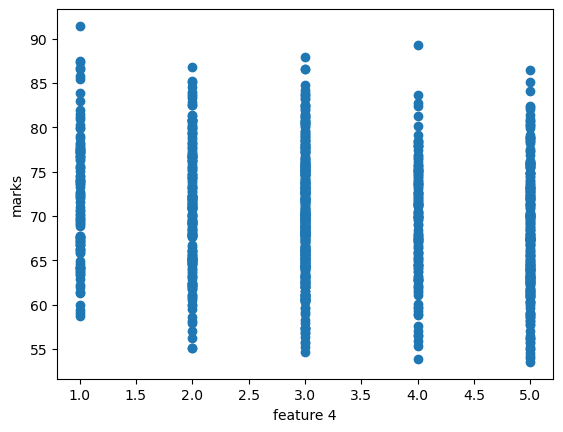

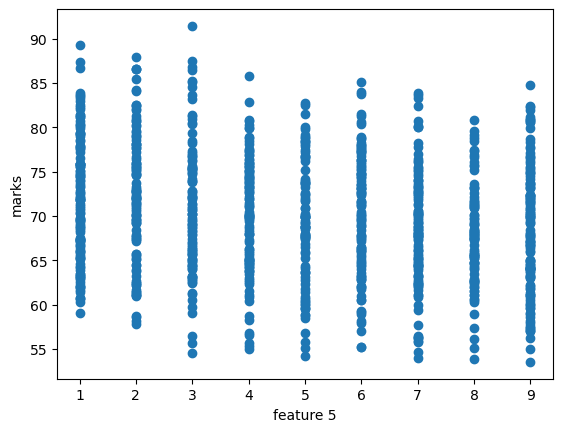

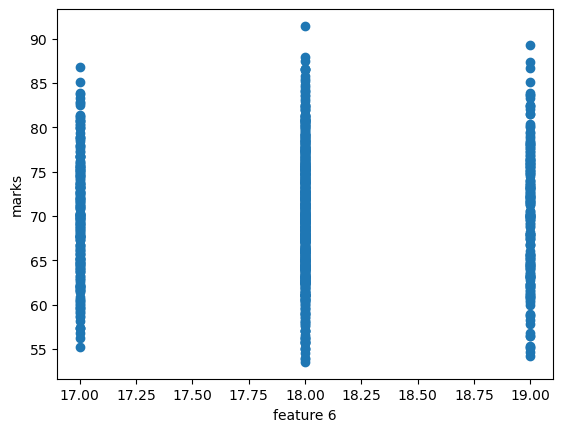

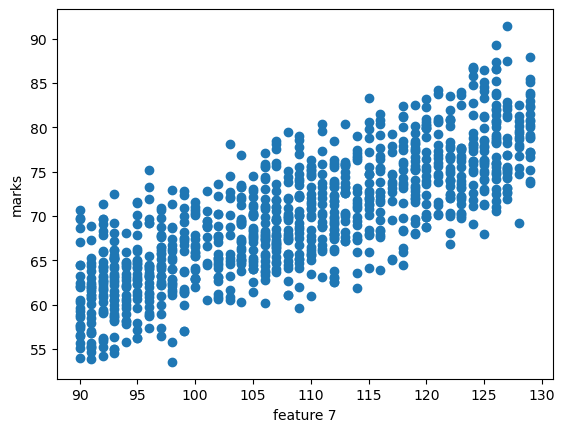

[0 1 2 2 5 6 18 118]


In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
print(data.head())
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
print(x_train.shape,y_train.shape)
print(x_train[0],y_train[0])
#plots
for i in range(2,len(x_train[0])):
    plt.scatter(x_train[:,i],y_train)
    plt.xlabel(f'feature {i}')
    plt.ylabel('marks')
    plt.show()

def feature_changing(x_train):
    
    x_train[:,1][x_train[:,1] == "M"] = 1
    x_train[:,1][x_train[:,1] == "F"] = 0
  
    x_train[:,0][x_train[:,0] == "yes"] = 1
    x_train[:,0][x_train[:,0] == "no"] = 0

    return x_train

x_train = feature_changing(x_train)
print(x_train[0])

In [3]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    print(x_mean)
    x_std = np.std(x_train, axis=0)
    print(x_std)

    x_train_standardized = (x_train - x_mean) / x_std
 
    return x_train_standardized,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):
    y_pred = np.dot(x_train,w) + b
    loss = np.sum(y_pred - y_train)**2

    return loss

In [5]:
def gradient_descent(x_train,y_train,w,b):
    m = x_train.shape[0]
    learning_rate = 0.0001

    predictions = np.dot(x_train, w) + b

    # Compute the error
    error = predictions - y_train

    # Compute gradients
    dw = (2/m) * np.dot(x_train.T, error)
    db = (2/m) * np.sum(error)

    # Update parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w,b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
    old_cost = cost(x_train,y_train,w,b)
    w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

[  0.682   0.577   1.742   2.102   3.191   4.999  17.979 109.026]
[ 0.46569947  0.49403542  0.89968661  0.92281959  1.26827402  2.66289298
  0.63289731 11.63337114]
Congratulations, your accuracy is 100.0%
